In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
#Read in the CSV
myo_df = pd.read_csv("myopia.csv")
myo_df.head(3)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0


In [3]:
#Check for nulls
myo_df.isnull().values.any()

False

In [4]:
#Check for column types
myo_df.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [5]:
#Shape
myo_df.shape

(618, 15)

In [6]:
#Drop the 'MYOPIC' Column
myo_df = myo_df.drop(columns='MYOPIC')

In [7]:
#Confirm Drop with Shape
myo_df.shape

(618, 14)

In [8]:
##Confirm Drop with head()
myo_df.head(3)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0


In [9]:
#Standardize
scaler = StandardScaler()
scaler.fit(myo_df)

StandardScaler()

In [10]:
#Transform The Train and Test
myo_formed = scaler.transform(myo_df)

In [12]:
#Demensionality Reduction
# 90% PCA
pca = PCA(n_components = .90)
myo_pca = pca.fit_transform(myo_formed)

In [13]:
# Variance Ratio
pca.explained_variance_ratio_

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [14]:
tsne = TSNE(learning_rate = 35)
myo_tsne = tsne.fit_transform(myo_formed)

In [16]:
myo_tsne

array([[-14.286753 ,  22.387108 ],
       [  2.1481202,  18.38739  ],
       [  5.432401 ,  -9.756952 ],
       ...,
       [  1.4185946,  15.1066265],
       [ 11.904125 , -15.85626  ],
       [  1.2790555,   8.598273 ]], dtype=float32)

In [17]:
#Creating Variable for Plot
myo_df['x'] = myo_tsne[:,0]
myo_df['y'] = myo_tsne[:,1]

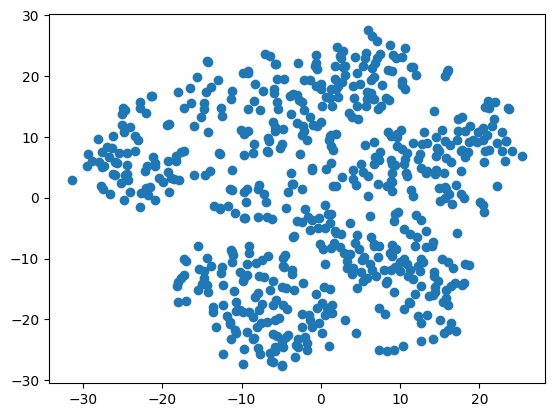

In [18]:
plt.scatter(myo_df['x'], myo_df['y']  )
plt.show()

In [19]:
inertia = []
k = list(range(1, 11))

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=30)
    kmeans.fit(myo_df)
    inertia.append(kmeans.inertia_)
    
curve_info = {"k": k, "inertia": inertia}
curve_df = pd.DataFrame(curve_info)
    

/opt/anaconda3/envs/pythondata/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/pythondata/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/pythondata/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/envs/pythondata/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

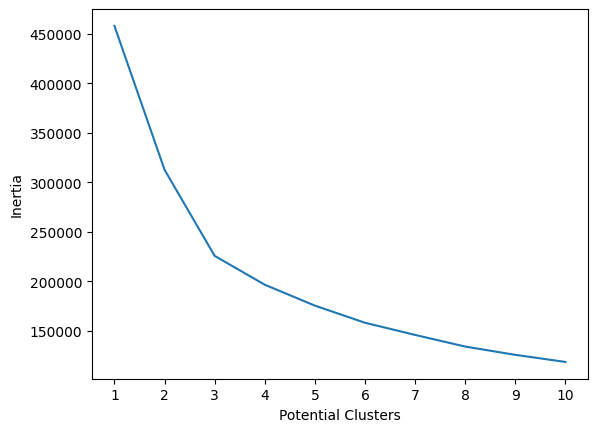

In [20]:
# PLOT
plt.plot(curve_df['k'], curve_df['inertia'])
plt.xticks(list(range(1,11)))
plt.xlabel("Potential Clusters")
plt.ylabel("Inertia")
plt.show()

# Potential Clusters
### There is are pronounced flattening at 6. The customers have the potential to fit into six clusters.